## 样本预处理

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print '乳腺癌数据集纬度：{}，阳性样本数：{}，阴性样本数：{}'.format(X.shape, y[y == 1].shape[0], y[y == 0].shape[0])
print '其中，训练样本数：{}，测试样本数：{}'.format(X_train.shape[0], X_test.shape[0])

# 数据预处理
scaler = MinMaxScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test)

乳腺癌数据集纬度：(569, 30)，阳性样本数：357，阴性样本数：212
其中，训练样本数：398，测试样本数：171


## MLPClassifier

In [26]:
# 1. 观察特征是否缩放对模型的影响
from sklearn.neural_network import MLPClassifier

# 学习未经缩放的特征
clf1 = MLPClassifier()
clf1.fit(X_train, y_train)
score1 = clf1.score(X_test, y_test)

# 学习经缩放的特征
clf2 = MLPClassifier()
clf2.fit(X_train_scaler, y_train)
score2 = clf2.score(X_test_scaler, y_test)

print '学习未经缩放的特征时打分：{}，学习经缩放的特征时打分：{}'.format(score1, score2)  # score2 明显大于 score1，说明在 MLP 中，经缩放后的特征训练效果更好
# 学习未经缩放的特征时打分：0.865497076023，学习经缩放的特征时打分：0.906432748538

学习未经缩放的特征时打分：0.842105263158，学习经缩放的特征时打分：0.912280701754


In [49]:
# 2. 寻找最优参数
from sklearn.model_selection import GridSearchCV

param_grid = {'hidden_layer_sizes': [100, 200, 300, 400], 'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'], 
              'learning_rate': ['constant', 'invscaling', 'adaptive']}
clf3 = GridSearchCV(MLPClassifier(), param_grid, cv=5)
clf3.fit(X_train_scaler, y_train)
score3 = clf3.score(X_test_scaler, y_test)
print '最优参数: {}，训练集上最优分数: {}，测试集上分数：{}'.format(clf3.best_params_, clf3.best_score_, score3)
# 最优参数: {'activation': 'logistic', 'solver': 'lbfgs', 'learning_rate': 'constant', 'hidden_layer_sizes': 200}，训练集上最优分数: 0.974874371859，测试集上分数：0.830409356725

最优参数: {'activation': 'logistic', 'solver': 'lbfgs', 'learning_rate': 'constant', 'hidden_layer_sizes': 200}，训练集上最优分数: 0.974874371859，测试集上分数：0.830409356725


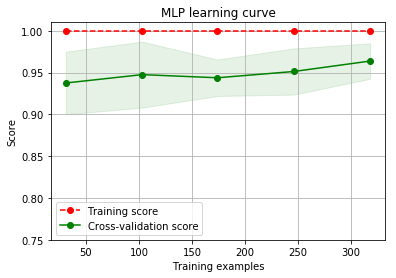

In [50]:
# 3. 学习曲线
import sys
sys.path.append('/home/centos/leon/machine_learning_jupyter')
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
from utils.sklearn_util import plot_learning_curve

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
clf4 = MLPClassifier(hidden_layer_sizes=200, activation='logistic', learning_rate='constant', solver='lbfgs')

plot_learning_curve(plt, clf4, 'MLP learning curve', X_train_scaler, y_train, ylim=(0.75, 1.01), cv=cv)
plt.show()

## MLPRegressor

In [96]:
# 拟合正弦曲线
import numpy as np
from sklearn.neural_network import MLPRegressor

# 生成 200 个在 [-2π,2π] 区间的正弦函数上的点，并加入一些随机噪声
n_dots = 200
X = np.linspace(-2 * np.pi, 2 * np.pi, n_dots)
y = np.sin(X) + 0.2 * np.random.rand(n_dots) - 0.1
X = X.reshape(-1, 1)

# 寻找最优参数
param_grid2 = {'hidden_layer_sizes': [100, 200, 300, 400], 'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'], 
              'learning_rate': ['constant', 'invscaling', 'adaptive']}
model = GridSearchCV(MLPRegressor(), param_grid2, cv=10)
model.fit(X, y)
print '最优参数: {}，训练集上最优分数: {}'.format(model.best_params_, model.best_score_)

最优参数: {'activation': 'tanh', 'solver': 'lbfgs', 'learning_rate': 'constant', 'hidden_layer_sizes': 200}，训练集上最优分数: 0.440025183136


模型评分：0.983364983782


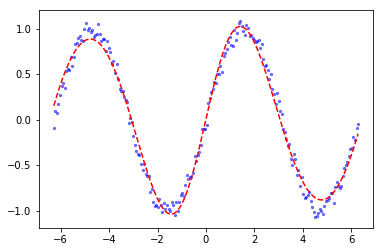

In [97]:
# 训练
ml = MLPRegressor(hidden_layer_sizes=400, activation='tanh', solver='lbfgs', learning_rate='constant')
ml.fit(X, y)
print '模型评分：{}'.format(ml.score(X, y))

# 画出曲线
plt.scatter(X, y, s=5, c='b', alpha=0.5)
plt.plot(X, ml.predict(X), 'r--')
plt.show()